In [1]:
import pandas as pd

In [11]:
order1 = pd.read_csv('training_data/order_data/order_data_2016-01-01', delimiter='\t',header = None)

In [12]:
order1.shape

(501287, 7)

In [13]:
order1.describe()

,5
count,501287.000000
mean,18.792990
std,16.913423
min,0.000000
25%,8.000000
50%,14.000000
75%,23.000000
max,499.000000


In [14]:
order1.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [127]:
order1.columns = ["order_id", "driver_id","passenger_id","start_district_hash", "dest_district_hash", "Price","Time"]

In [128]:
order1.head()

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,Price,Time
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24,2016-01-01 13:37:23
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2,2016-01-01 09:47:54
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9,2016-01-01 18:24:02
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11,2016-01-01 22:13:27
4,139d492189ae5a933122c098f63252b3,NaN,26963cc76da2d8450d8f23fc357db987,fc34648599753c9e74ab238e9a4a07ad,87285a66236346350541b8815c5fae94,4,2016-01-01 17:00:06


In [130]:
a = pd.to_datetime(order1.Time,unit='s')
a.head()

0   2016-01-01 13:37:23
1   2016-01-01 09:47:54
2   2016-01-01 18:24:02
3   2016-01-01 22:13:27
4   2016-01-01 17:00:06
Name: Time, dtype: datetime64[ns]

In [140]:
import datetime

In [150]:
diff = pd.to_datetime(order1.Time, unit = 's') - datetime.datetime(2016,1,1)

In [175]:
a[:15]

0    2016-01-01 13:37:23
1    2016-01-01 09:47:54
2    2016-01-01 18:24:02
3    2016-01-01 22:13:27
4    2016-01-01 17:00:06
5    2016-01-01 06:10:34
6    2016-01-01 17:34:33
7    2016-01-01 12:12:55
8    2016-01-01 14:28:07
9    2016-01-01 21:56:29
10   2016-01-01 00:59:43
11   2016-01-01 13:03:18
12   2016-01-01 16:00:39
13   2016-01-01 19:39:54
14   2016-01-01 00:25:44
Name: Time, dtype: datetime64[ns]

In [174]:
diff[:15]

0    13:37:23
1    09:47:54
2    18:24:02
3    22:13:27
4    17:00:06
5    06:10:34
6    17:34:33
7    12:12:55
8    14:28:07
9    21:56:29
10   00:59:43
11   13:03:18
12   16:00:39
13   19:39:54
14   00:25:44
Name: Time, dtype: timedelta64[ns]

In [180]:
import numpy as np

In [184]:
diff_time = (diff.dt.seconds/600).astype(np.int64) + 1

In [187]:
diff_time.value_counts()

5      7942
6      7842
4      7413
7      7160
8      6649
9      5935
104    5505
105    5480
103    5463
101    5365
106    5310
102    5263
10     5262
3      5233
107    5176
100    4883
83     4877
91     4802
108    4782
84     4777
81     4769
99     4738
88     4704
86     4694
80     4683
92     4676
89     4670
82     4658
71     4638
73     4635
       ... 
137    2216
38     2099
138    2061
37     1829
17     1824
18     1759
139    1689
142    1659
19     1647
140    1628
143    1568
141    1542
36     1475
20     1447
144    1429
35     1305
21     1120
34     1077
22     1064
33      954
32      881
27      817
23      811
31      810
24      803
25      793
26      770
30      745
29      729
28      716
Name: Time, dtype: int64

In [32]:
import re
fh = open('training_data/poi_data/poi_data')
SEPS = ('\t', ':')
rsplit = re.compile("|".join(SEPS)).split
content = []
for  line in  fh.readlines(): 
    #print line
    a = [s.strip() for s in rsplit(line)]
    b = dict(zip(a[1::2], a[2::2]))
    b['name'] = a[0]
    content.append(b)
poi_data = pd.DataFrame(content)

In [34]:
poi_data.shape

(66, 177)

In [37]:
poi_data.describe()

,1,1#1,1#10,1#11,1#2,1#3,1#4,1#5,1#6,1#7,...,7#2,7#3,8,8#1,8#2,8#3,8#4,8#5,9#1#1,name
count,56,31,28,57,54,37,37,61,37,20,...,20,1,25,23,63,48,61,12,1,66
unique,25,9,6,26,19,8,8,40,6,6,...,3,1,9,9,38,26,31,5,1,66
top,83,83,83,83,83,83,83,249,83,83,...,83,83,83,83,249,166,332,83,14,4b7f6f4e2bf237b6cc58f57142bea5c0
freq,15,13,16,8,13,17,22,5,19,10,...,11,1,9,9,5,13,6,7,1,1


In [45]:
cluster_map = pd.read_table('training_data/cluster_map/cluster_map', delimiter='\t',header = None)

In [46]:
cluster_map.columns = ["name", "mapID"]

In [54]:
cluster_map.tail()

,name,mapID
61,a735449c5c09df639c35a7d61fad3ee5,62
62,0a5fef95db34383403d11cb6af937309,63
63,bf44d327f0232325c6d5280926d7b37d,64
64,825a21aa308dea206adb49c4b77c7805,65
65,1ecbb52d73c522f184a6fc53128b1ea1,66


In [68]:
region_data = pd.concat([cluster_map, poi_data], axis = 1)

In [62]:
region_data.fillna(0,inplace="True")

In [69]:
region_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Columns: 179 entries, name to name
dtypes: int64(1), object(178)
memory usage: 92.8+ KB


In [97]:
region_data[region_data.columns[region_data.columns.str.startswith('17')].values].describe()

,17,17#1,17#2,17#3,17#4,17#5
count,51,10,61,23,40,59
unique,22,5,37,9,22,38
top,83,166,747,83,83,166
freq,11,3,5,10,12,7


In [87]:
region_data[region_data.columns[region_data.columns.str.startswith('1')].values].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 76 columns):
1        56 non-null object
1#1      31 non-null object
1#10     28 non-null object
1#11     57 non-null object
1#2      54 non-null object
1#3      37 non-null object
1#4      37 non-null object
1#5      61 non-null object
1#6      37 non-null object
1#7      20 non-null object
1#8      56 non-null object
1#9      26 non-null object
10#1     1 non-null object
11       63 non-null object
11#1     46 non-null object
11#2     52 non-null object
11#3     48 non-null object
11#4     62 non-null object
11#5     40 non-null object
11#6     62 non-null object
11#7     55 non-null object
11#8     64 non-null object
12       4 non-null object
13#1     1 non-null object
13#2     1 non-null object
13#3     1 non-null object
13#4     66 non-null object
13#5     30 non-null object
13#6     34 non-null object
13#7     1 non-null object
13#8     36 non-null object
14       44 non-null object
14#1   

In [88]:
region_data[region_data.columns[region_data.columns.str.startswith('2')].values].describe()

,2#1,2#10,2#11,2#12,2#13,2#2,2#3,2#4,2#5,2#6,...,25,25#1,25#2,25#3,25#4,25#5,25#6,25#7,25#8,25#9
count,32,63,30,57,32,59,33,30,59,53,...,63,13,16,23,6,18,29,63,43,64
unique,8,22,8,30,20,36,9,7,15,21,...,23,3,6,12,3,6,9,29,22,41
top,83,332,83,83,83,166,83,83,249,83,...,249,83,83,83,83,166,83,332,83,166
freq,16,8,12,8,9,6,14,16,12,18,...,8,11,8,7,4,6,8,7,9,4


In [89]:
region_data[region_data.columns[region_data.columns.str.startswith('3')].values].describe()

,3,3#1,3#2,3#3,3#4,3#5
count,12,65,20,41,1,4
unique,2,38,5,7,1,1
top,83,2739,83,83,83,83
freq,9,4,8,20,1,4


In [93]:
region_data[region_data.columns[region_data.columns.str.startswith('4')].values].describe()

,4,4#1,4#10,4#11,4#12,4#13,4#14,4#15,4#16,4#17,4#18,4#2,4#3,4#4,4#5,4#6,4#7,4#8,4#9
count,63,54,44,54,18,44,57,1,54,62,63,62,40,15,52,38,36,42,46
unique,40,15,23,25,6,25,28,1,10,27,27,30,18,5,28,13,13,9,20
top,249,83,83,83,83,83,581,7,166,83,249,249,166,83,166,83,166,249,249
freq,4,13,9,11,10,7,6,1,18,12,7,8,6,7,7,12,7,10,9


In [92]:
region_data.to_csv("region_data.csv", sep="\t")

In [116]:
region_data[region_data.columns[region_data.columns.str.startswith('4')].values].describe()

,4,4#1,4#10,4#11,4#12,4#13,4#14,4#15,4#16,4#17,4#18,4#2,4#3,4#4,4#5,4#6,4#7,4#8,4#9
count,63,54,44,54,18,44,57,1,54,62,63,62,40,15,52,38,36,42,46
unique,40,15,23,25,6,25,28,1,10,27,27,30,18,5,28,13,13,9,20
top,249,83,83,83,83,83,581,7,166,83,249,249,166,83,166,83,166,249,249
freq,4,13,9,11,10,7,6,1,18,12,7,8,6,7,7,12,7,10,9


In [115]:
region_data.columns[region_data.count()<=5].values.size

24

In [117]:
region_data[region_data.columns[region_data.columns.str.startswith('5')].values].describe()

,5,5#1,5#2,5#3,5#4
count,21,55,5,52,20
unique,7,27,2,21,3
top,83,166,83,83,83
freq,7,7,4,15,16


In [122]:
region_data[region_data.columns[region_data.columns.str.startswith('6')].values].describe()

,6,6#1,6#2,6#3,6#4
count,63,46,37,18,31
unique,44,20,17,10,11
top,166,83,83,83,83
freq,6,12,11,7,13


In [123]:
region_data[region_data.columns[region_data.columns.str.startswith('7')].values].describe()

,7,7#1,7#2,7#3
count,66,4,20,1
unique,45,1,3,1
top,2158,83,83,83
freq,5,4,11,1


In [124]:
region_data[region_data.columns[region_data.columns.str.startswith('8')].values].describe()

,8,8#1,8#2,8#3,8#4,8#5
count,25,23,63,48,61,12
unique,9,9,38,26,31,5
top,83,83,249,166,332,83
freq,9,9,5,13,6,7


In [125]:
region_data[region_data.columns[region_data.columns.str.startswith('9')].values].describe()

,9#1#1
count,1
unique,1
top,14
freq,1


In [191]:
from sklearn.decomposition import PCA

In [196]:
region_data.index = region_data["mapID"]
region_data_new = region_data.drop(['name', 'mapID'], axis=1) 

In [199]:
region_data_new.fillna(0, inplace = "True")

In [237]:
region_data_new = region_data_new.astype(np.float64)

In [238]:
pca = PCA(n_components=2)
pca.fit(region_data_new)

PCA(copy=True, n_components=2, whiten=False)

In [239]:
existing_2d = pca.transform(region_data_new)

In [240]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = region_data_new.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
mapID,,
1,-139858.882765,-31239.960978
2,54443.137375,4218.688758
3,42123.460744,2508.576626
4,38055.489220,-448.513652
5,54075.264428,2989.558646


In [241]:
print(pca.explained_variance_ratio_) 

[ 0.9321148   0.02561053]


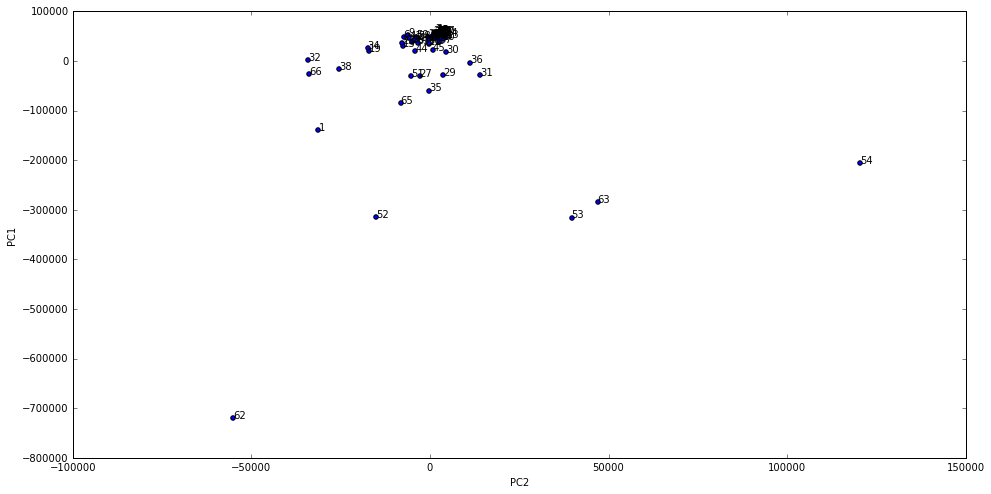

In [242]:
%matplotlib inline
import matplotlib

ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(region_data_new.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )


In [243]:
from sklearn.preprocessing import normalize

existing_df_2d['region_mean'] = pd.Series(region_data_new.mean(axis=1), index=existing_df_2d.index)
region_mean_max = existing_df_2d['region_mean'].max()
region_mean_min = existing_df_2d['region_mean'].min()
region_mean_scaled = (existing_df_2d.region_mean-region_mean_min) / region_mean_max
existing_df_2d['region_mean_scaled'] = pd.Series(
        region_mean_scaled, 
        index=existing_df_2d.index) 
existing_df_2d.head()


,PC1,PC2,region_mean,region_mean_scaled
mapID,,,,
1,-139858.882765,-31239.960978,4991.789773,0.262080
2,54443.137375,4218.688758,290.500000,0.014410
3,42123.460744,2508.576626,592.318182,0.030310
4,38055.489220,-448.513652,692.295455,0.035577
5,54075.264428,2989.558646,213.630682,0.010360


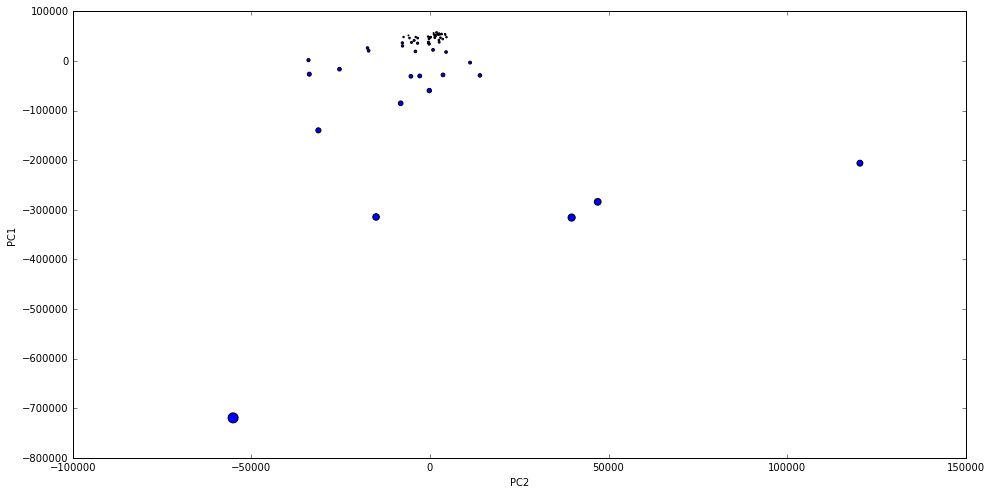

In [245]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['region_mean_scaled']*100, 
    figsize=(16,8))


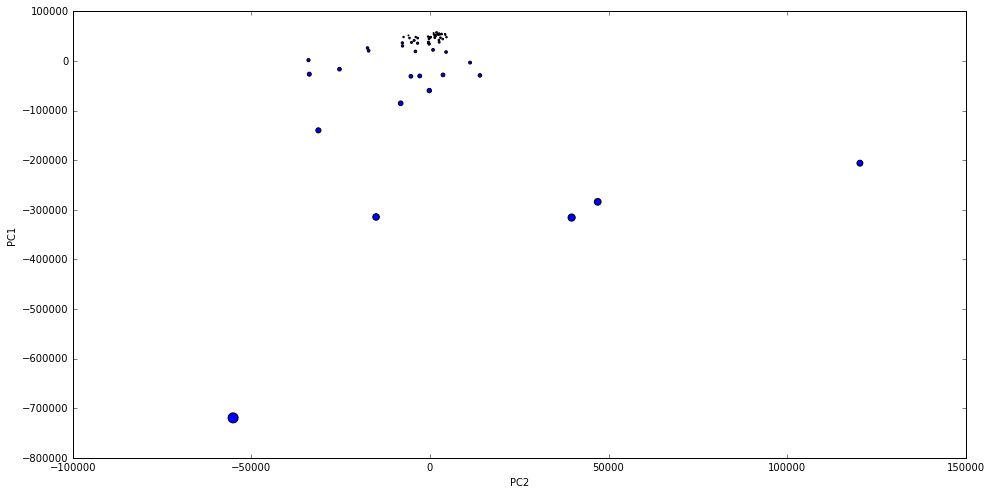

In [247]:
existing_df_2d['region_sum'] = pd.Series(
    region_data_new.sum(axis=1), 
    index=existing_df_2d.index)
region_sum_max = existing_df_2d['region_sum'].max()
region_sum_min = existing_df_2d['region_sum'].min()
region_sum_scaled = (existing_df_2d.region_sum-region_sum_min) / region_sum_max
existing_df_2d['region_sum_scaled'] = pd.Series(
        region_sum_scaled, 
        index=existing_df_2d.index)
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['region_sum_scaled']*100, 
    figsize=(16,8))

In [261]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(region_data_new)


In [262]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

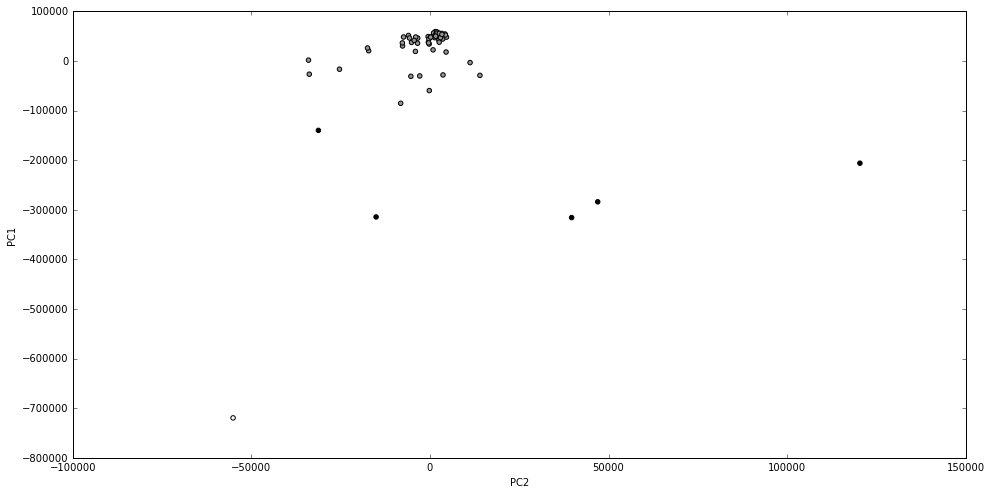

In [263]:
import numpy as np

existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(16,8))


In [264]:
existing_df_2d.cluster.astype(np.float).value_counts()

1    60
2     5
0     1
Name: cluster, dtype: int64

In [265]:
existing_df_2d[existing_df_2d.cluster==2]

,PC1,PC2,region_mean,region_mean_scaled,region_sum,region_sum_scaled,cluster
mapID,,,,,,,
1,-139858.882765,-31239.960978,4991.789773,0.262080,878555,0.262080,2
52,-314437.040345,-15082.837740,8164.323864,0.429214,1436921,0.429214,2
53,-315662.195974,39676.157843,9721.846591,0.511267,1711045,0.511267,2
54,-206024.073545,120401.971273,6675.369318,0.350774,1174865,0.350774,2
63,-283886.856712,46979.249325,8627.284091,0.453604,1518402,0.453604,2


In [267]:
existing_df_2d[existing_df_2d.cluster==0]

,PC1,PC2,region_mean,region_mean_scaled,region_sum,region_sum_scaled,cluster
mapID,,,,,,,
62,-719532.980088,-55121.80596,18982.005682,0.999106,3340833,0.999106,0
